In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load Domainnome

In [56]:
# download the domainome data first
filePath = "data/Supplementary_Table_2_fitness_scores_normalized.txt"
data = pd.read_csv(filePath, sep="\t")
data

,domain_ID,uniprot_ID,aa_seq,wt_aa,position,mut_aa,STOP,input_count_rep1,input_count_rep2,input_count_rep3,output_count_rep1,output_count_rep2,output_count_rep3,mean_input_count,fitness,fitness_sigma,normalized_fitness,normalized_fitness_sigma,clinical_class
0,P57071_PF00096_1085,P57071,*CEQCGKSFARKDMLKEHMRVH,A,1085.0,*,True,73.0,89.0,84.0,1.0,4.0,5.0,82.000000,-0.006228,0.022911,-1.445534,0.317667,NaN
1,P57071_PF00096_1085,P57071,A*EQCGKSFARKDMLKEHMRVH,C,1086.0,*,True,59.0,82.0,78.0,7.0,0.0,0.0,73.000000,0.028656,0.029636,-0.961864,0.410906,NaN
2,P57071_PF00096_1085,P57071,AAEQCGKSFARKDMLKEHMRVH,C,1086.0,A,False,190.0,223.0,191.0,133.0,125.0,46.0,201.333333,0.075688,0.006956,-0.309755,0.096451,NaN
3,P57071_PF00096_1085,P57071,AC*QCGKSFARKDMLKEHMRVH,E,1087.0,*,True,161.0,179.0,149.0,3.0,2.0,13.0,163.000000,-0.001982,0.017544,-1.386659,0.243252,NaN
4,P57071_PF00096_1085,P57071,ACAQCGKSFARKDMLKEHMRVH,E,1087.0,A,False,150.0,161.0,128.0,74.0,48.0,56.0,146.333333,0.069597,0.008001,-0.394199,0.110932,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10961,Q14CM0_PF00595_75,Q14CM0,APRKVEPRRDPVLGFGFVAGSEKPVVVRSVTPGGPSEGKLIPGDQI...,M,81.0,P,False,669.0,716.0,620.0,117.0,142.0,229.0,668.333300,0.050468,0.004837,-0.747899,0.037394,NaN
10962,Q14CM0_PF00595_75,Q14CM0,APRKVEQRRDPVLGFGFVAGSEKPVVVRSVTPGGPSEGKLIPGDQI...,M,81.0,Q,False,502.0,409.0,424.0,25.0,65.0,47.0,445.000000,0.026039,0.007391,-0.936769,0.057141,NaN
10963,Q14CM0_PF00595_75,Q14CM0,APRKVERRRDPVLGFGFVAGSEKPVVVRSVTPGGPSEGKLIPGDQI...,M,81.0,R,False,2110.0,2139.0,2047.0,160.0,196.0,269.0,2098.667000,0.022188,0.004143,-0.966541,0.032033,NaN
10964,Q14CM0_PF00595_75,Q14CM0,APRKVESRRDPVLGFGFVAGSEKPVVVRSVTPGGPSEGKLIPGDQI...,M,81.0,S,False,1114.0,1136.0,1059.0,732.0,517.0,577.0,1103.000000,0.077999,0.003452,-0.535050,0.026692,NaN


In [40]:
# preprocess data
# first add a row with wt_seq, wt_name and mut_type columns and position starting with zero
# group by domain_ID, get first row, get sequence, change the * in the sequence to the wt_aa
# group  df by domain_ID
df = data.groupby("domain_ID")

# The position column is not zero based, so we need to make it zero based
# for each group get minimum position
df_min = df["position"].min()
# subtract this from data 
data["position_abs"] = data.apply(lambda x: x["position"] - df_min[x["domain_ID"]], axis=1)

# for each group get first row and get the sequence
df_first = df.first()

def replace_star(row):
    seq = row["aa_seq"]
    wt_aa = row["wt_aa"]
    return seq.replace("*", wt_aa)

df_first['aa_seq'] = df_first.apply(replace_star, axis=1)

# replace the aa_seq column with the corrected sequence, for whole df
data["aa_seq"] = data["domain_ID"].map(df_first["aa_seq"])
data

,domain_ID,uniprot_ID,aa_seq,wt_aa,position,mut_aa,STOP,input_count_rep1,input_count_rep2,input_count_rep3,output_count_rep1,output_count_rep2,output_count_rep3,mean_input_count,fitness,fitness_sigma,normalized_fitness,normalized_fitness_sigma,clinical_class,position_abs
0,P57071_PF00096_1085,P57071,ACEQCGKSFARKDMLKEHMRVH,A,1085.0,*,True,73.0,89.0,84.0,1.0,4.0,5.0,82.000000,-0.006228,0.022911,-1.445534,0.317667,NaN,0.0
1,P57071_PF00096_1085,P57071,ACEQCGKSFARKDMLKEHMRVH,C,1086.0,*,True,59.0,82.0,78.0,7.0,0.0,0.0,73.000000,0.028656,0.029636,-0.961864,0.410906,NaN,1.0
2,P57071_PF00096_1085,P57071,ACEQCGKSFARKDMLKEHMRVH,C,1086.0,A,False,190.0,223.0,191.0,133.0,125.0,46.0,201.333333,0.075688,0.006956,-0.309755,0.096451,NaN,1.0
3,P57071_PF00096_1085,P57071,ACEQCGKSFARKDMLKEHMRVH,E,1087.0,*,True,161.0,179.0,149.0,3.0,2.0,13.0,163.000000,-0.001982,0.017544,-1.386659,0.243252,NaN,2.0
4,P57071_PF00096_1085,P57071,ACEQCGKSFARKDMLKEHMRVH,E,1087.0,A,False,150.0,161.0,128.0,74.0,48.0,56.0,146.333333,0.069597,0.008001,-0.394199,0.110932,NaN,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10961,Q14CM0_PF00595_75,Q14CM0,APRKVEMRRDPVLGFGFVAGSEKPVVVRSVTPGGPSEGKLIPGDQI...,M,81.0,P,False,669.0,716.0,620.0,117.0,142.0,229.0,668.333300,0.050468,0.004837,-0.747899,0.037394,NaN,6.0
10962,Q14CM0_PF00595_75,Q14CM0,APRKVEMRRDPVLGFGFVAGSEKPVVVRSVTPGGPSEGKLIPGDQI...,M,81.0,Q,False,502.0,409.0,424.0,25.0,65.0,47.0,445.000000,0.026039,0.007391,-0.936769,0.057141,NaN,6.0
10963,Q14CM0_PF00595_75,Q14CM0,APRKVEMRRDPVLGFGFVAGSEKPVVVRSVTPGGPSEGKLIPGDQI...,M,81.0,R,False,2110.0,2139.0,2047.0,160.0,196.0,269.0,2098.667000,0.022188,0.004143,-0.966541,0.032033,NaN,6.0
10964,Q14CM0_PF00595_75,Q14CM0,APRKVEMRRDPVLGFGFVAGSEKPVVVRSVTPGGPSEGKLIPGDQI...,M,81.0,S,False,1114.0,1136.0,1059.0,732.0,517.0,577.0,1103.000000,0.077999,0.003452,-0.535050,0.026692,NaN,6.0


<Axes: xlabel='normalized_fitness', ylabel='Count'>

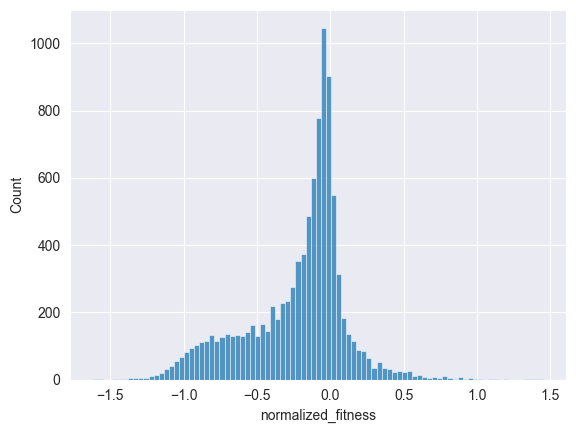

In [33]:
#Plot normalized fitness (ddG) of dataset
sns.histplot(data,x="normalized_fitness")

# Load Megascale data

In [ ]:
df = pd.read_csv('data/mega_train.csv', sep=",")
# only keep mutation rows
df = df[df.mut_type!="wt"]
df

In [ ]:
#Plot ddG
sns.histplot(data,x="ddG_ML")

# 3D structure

In [ ]:
import py3Dmol # Visualising 3D structures; install with pip install py3Dmol

# visualizing structure predicted by alphafold (and coloring different residues)
# Find the AF structure here: https://alphafold.ebi.ac.uk/entry/Q13882
# download from https://alphafold.ebi.ac.uk/files/AF-Q13882-F1-model_v4.pdb
view = py3Dmol.view()
view.addModel(open('data/AF-Q13882-F1-model_v4.pdb', 'r').read(), 'pdb')
view.setStyle({
    'cartoon': {
        'colorscheme': {
            'prop': 'resi',
            'map': { resi + 1: 'red' if resi + 1 <100 else 'blue' for resi in range(500) },
        },
        'arrows': True,
    }
})
view.zoomTo()
view.show()